In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

from IPython.display import display
from PIL import Image, ImageDraw
from shared.drawing import *
import numpy as np

In [38]:
square_size = 50
rows, cols = 10, 12
rotate_amt = (360/rows)

img_width = square_size * cols
img_height = square_size * rows


def mix_colors(sat: int = 100, lum: int = 50) -> list[Color]:
    colors = list[Color]()
    for row in range(rows):
        hue = row * rotate_amt + 55
        for col in range(cols):
            new_hue = (rotate_amt // cols) * col
            color = Color(hue + new_hue, sat, lum)
            colors.append(color)
    return colors


def paint_grid(palette: list[Color], canvas: ImageDraw):
    for row in range(rows):
        for col in range(cols):
            start_x = col * square_size
            start_y = row * square_size
            end_x = (1 + col) * square_size
            end_y = (1 + row) * square_size

            color = palette.pop().as_rgb()

            canvas.rectangle(
                [(start_x, start_y), (end_x, end_y)], color
            )


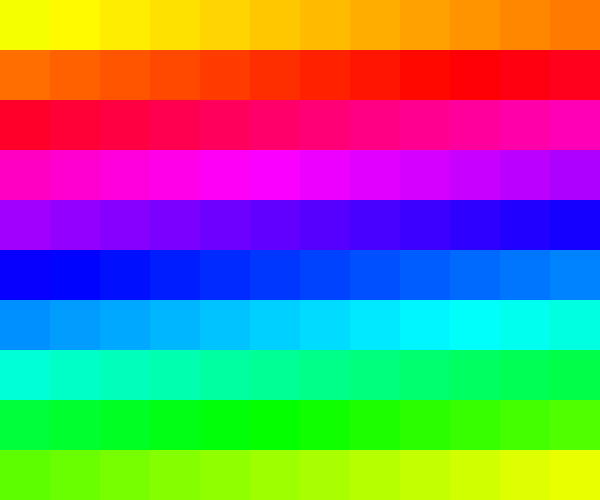

In [3]:
primes_img = Image.new('RGB', (img_width, img_height), 'white')
primes_canvas = ImageDraw.Draw(primes_img)

primes = mix_colors()

paint_grid(primes, primes_canvas)

display(primes_img)

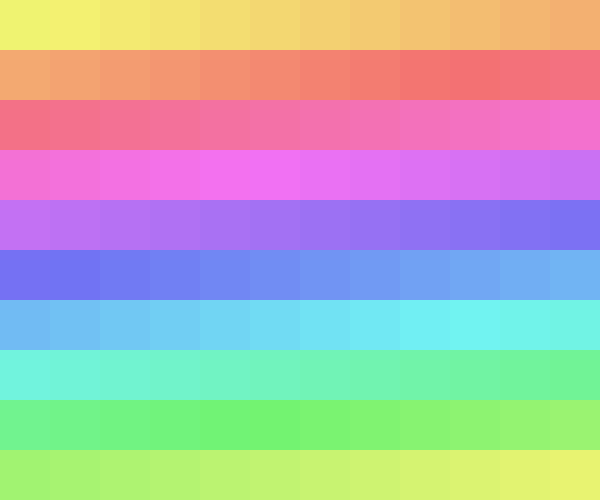

In [4]:
tints_img = Image.new('RGB', (img_width, img_height), 'white')
tints_canvas = ImageDraw.Draw(tints_img)

tints = mix_colors(85, 70)

paint_grid(tints, tints_canvas)

display(tints_img)

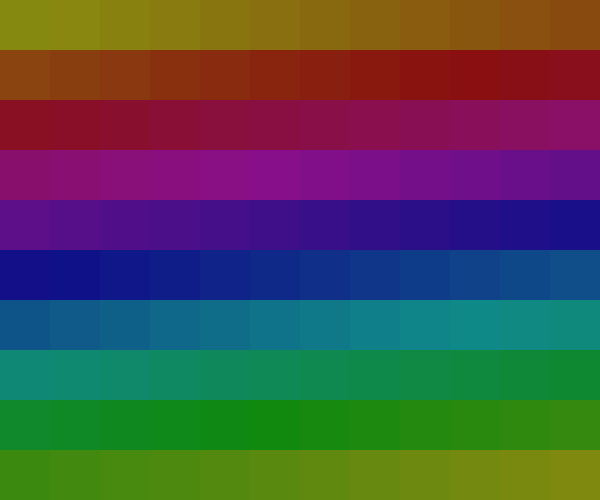

In [5]:
shades_img = Image.new('RGB', (img_width, img_height), 'white')
shades_canvas = ImageDraw.Draw(shades_img)

shades = mix_colors(80, 30)

paint_grid(shades, shades_canvas)

display(shades_img)

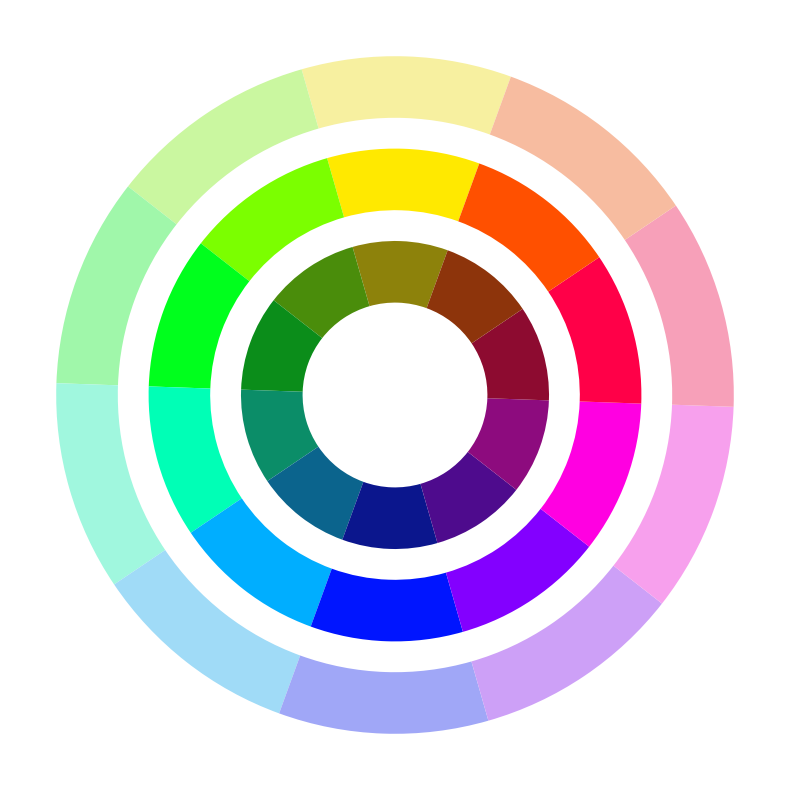

In [45]:
import matplotlib.pyplot as plt


def root_colors(sat=100, lum=50):
    all_colors = np.array(mix_colors(sat, lum))
    roots = [hsl.as_rgb() for hsl in all_colors[::rows+2]]
    normalized_roots = [(r/255, g/255, b/255) for r, g, b in roots]
    return normalized_roots

# Function to draw a donut layer
def draw_donut_layer(ax, wedge_sizes, colors, radius, width=0.2):
    ax.pie(wedge_sizes, 
           colors=colors, 
           radius=radius, 
           startangle=70,
           wedgeprops=dict(width=width))

# Define the root colors
tints = root_colors(85, 80)
hues = root_colors()
shades = root_colors(85, 30)

# Wedge sizes for each layer
wedge_sizes = [1/rows for x in range(rows)]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the three donut layers
# Reducing the radius of the innermost layer to make the hole smaller
draw_donut_layer(ax, wedge_sizes, shades, radius=0.5, width=0.2)  # First (innermost) layer, smaller radius, larger width
draw_donut_layer(ax, wedge_sizes, hues, radius=0.8, width=0.2)    # Second (middle) layer
draw_donut_layer(ax, wedge_sizes, tints, radius=1.1, width=0.2)   # Third (outermost) layer

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

plt.show()